# Iris Flower Dataset Assignment

**Preparing The Data:**  
    - First of all, we loaded the Iris dataset from Scikilt module.  
    - We printed the dataset, feature names & labels (target names).  
    - We split the data (features, labels) into 70% training, 30% testing.  

**Decision Tree Algorithm:**  
    - We defined a decision tree classifier.  
    - We trained the model using 'fit' function on the 70% data we put aside for training.  
    - We tested the X_test data we put aside for testing, using 'predict' function & got predict_dt.  
    - We checked the accuracy of our results against the y_test data we put aside - multiplied by 100 to get %,
      and got accuracy of approx. 95%.  
    - We visualized the decision tree.  

**KNN Algorithm:**  
    - We scaled down the 70% feature data (X_train, X_test), so we'll have all data in range.  
       That is needed in KNN algorithm, because it's training relays on minimum distance from specific point in range.  
    - We defined a KNN classifier.  
    - We trained the model using 'fit' function on the 70% scaled down features data and 70% labels data for training.  
    - We gave a default n_neighbors = 5 that gives higher accuracy results.  
    - We tested the X_test scaled down data using 'predict' function & got predict_knn.   
    - We checked the accuracy of our results against the y_test data we put aside - multiplied by 100 to get %,
      and got accuracy of approx. 97%.  

In [19]:
import pandas as pd
# import numpy as np
import plotly
import plotly.express as px
# import plotly.offline as pyo
import matplotlib.pyplot as plt
# import cufflinks as cf
import sklearn
# import os

In [20]:
# from plotly.offline import init_notebook_mode,plot,iplot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [21]:
iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [22]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [23]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [25]:
# Visualize data - px.scatter_matrix doesn't work
#px.scatter_matrix(iris,color='Species',title='Iris',dimensions=['sepal length (cm)','sepal width (cm)','petal length (cm)','sepal width (cm)'])

In [26]:
# Splitting dataset into train & test 
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [27]:
# Decision Tree Algorithm

In [28]:
# defining classifier & training data
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

In [29]:
# testing Decision Tree
prediction_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test,prediction_dt)*100

In [30]:
accuracy_dt

95.55555555555556

In [31]:
prediction_dt

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [32]:
y_test

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

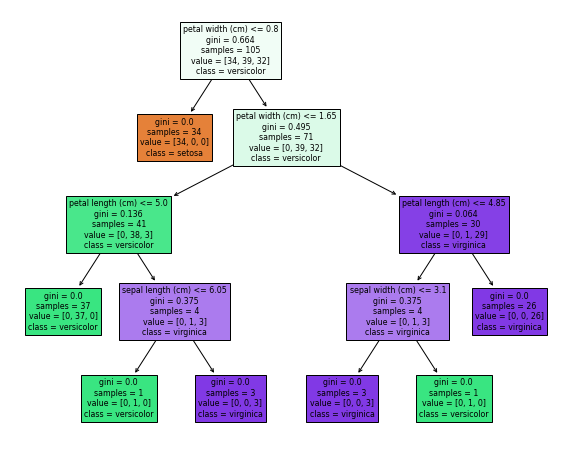

In [33]:
# visualize Decision Tree
plt.figure(figsize = (10,8))
tree.plot_tree(dt, feature_names = iris.feature_names, class_names = iris.target_names, filled = True);

In [34]:
# KNN Algorithm

In [35]:
sc = StandardScaler().fit(X_train)  # load standard scaler
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [36]:
# define KNN classifie
# Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std,y_train) # train model

KNeighborsClassifier()

In [37]:
predict_knn = knn.predict(X_test_std)
accuracy_knn = accuracy_score(y_test,predict_knn)*100

In [38]:
accuracy_knn

97.77777777777777